Name: Aayam Raj Shakya (as5160)

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# REFERENCE: https://www.geeksforgeeks.org/how-to-disable-python-warnings/
# Hiding warnings for cleaner look
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Iris dataset (Page 54)

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

5.2. For this problem, you would modify the code used for Problem 3.2 in Chapter 3. For the standardized data (XSD),


(a) Apply the logistic regression gradient descent (Algorithm 5.9).

In [3]:
# Gradient Descent for Logistic Regression
class LogisticGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        # Logistic regression uses sigmoid function as activation function
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [4]:
# Gradient descent rule for Adaline
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

(b) Compare the results with that of Adaline descent gradient.


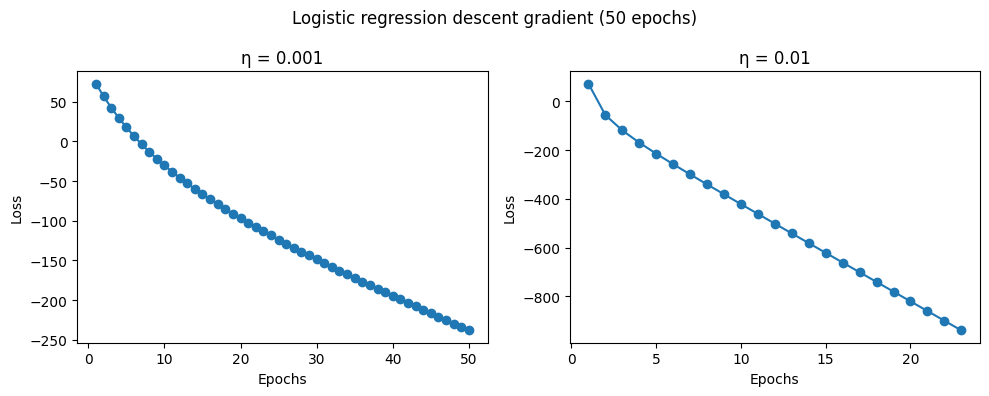

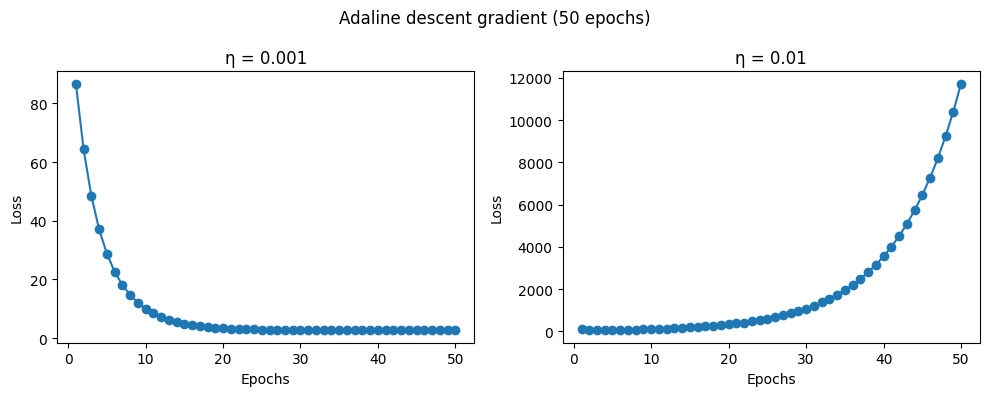

In [5]:
fig, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

log1 = LogisticGD(n_iter=50, eta=0.001).fit(X_train_std, y_train)
ax1[0].plot(range(1, len(log1.cost_) + 1), log1.cost_, marker='o')
ax1[0].set_xlabel('Epochs')
ax1[0].set_ylabel('Loss')
ax1[0].set_title('η = 0.001')

log2 = LogisticGD(n_iter=50, eta=0.01).fit(X_train_std, y_train)
ax1[1].plot(range(1, len(log2.cost_) + 1), log2.cost_, marker='o')
ax1[1].set_xlabel('Epochs')
ax1[1].set_ylabel('Loss')
ax1[1].set_title('η = 0.01')
plt.suptitle("Logistic regression descent gradient (50 epochs)")
plt.tight_layout()

fig, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=50, eta=0.001).fit(X_train_std, y_train)
ax2[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax2[0].set_xlabel('Epochs')
ax2[0].set_ylabel('Loss')
ax2[0].set_title('η = 0.001')

ada2 = AdalineGD(n_iter=50, eta=0.01).fit(X_train_std, y_train)
ax2[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax2[1].set_xlabel('Epochs')
ax2[1].set_ylabel('Loss')
ax2[1].set_title('η = 0.01')
plt.suptitle("Adaline descent gradient (50 epochs)")
plt.tight_layout()

plt.show()

Based on the graphical results, logistic regression GD is more robust than Adaline GD.

5.3. (Continuation of Problem 5.2). Perturb the standardized data (XSD) by a random Gaussian noise Gσ of an observable σ (so as for Gσ(XSD) not to be linearly separable).

a. Apply the logistic regression gradient descent (Algorithm 5.9) for the noisy data Gσ(XSD).


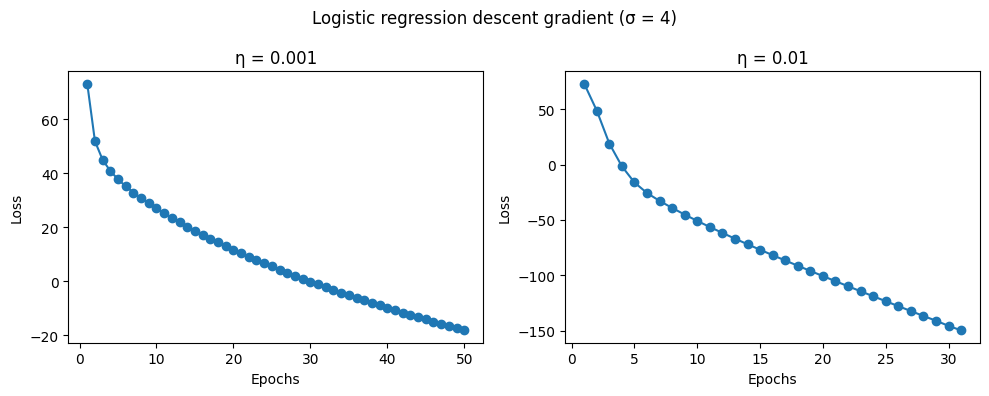

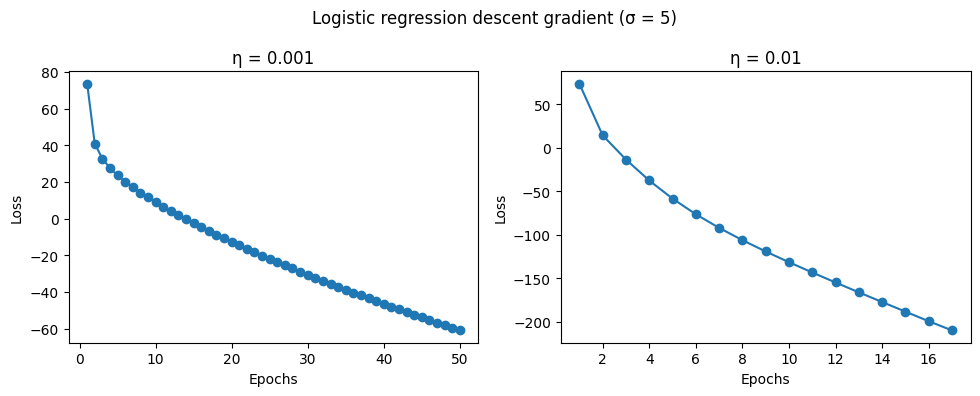

In [6]:
gaussian_noise_1 = np.random.normal(0, 4, X_train_std.shape)
X_noised_1 = X_train_std + gaussian_noise_1

fig, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

log1 = LogisticGD(n_iter=50, eta=0.001).fit(X_noised_1, y_train)
ax1[0].plot(range(1, len(log1.cost_) + 1), log1.cost_, marker='o')
ax1[0].set_xlabel('Epochs')
ax1[0].set_ylabel('Loss')
ax1[0].set_title('η = 0.001')

log2 = LogisticGD(n_iter=50, eta=0.01).fit(X_noised_1, y_train)
ax1[1].plot(range(1, len(log2.cost_) + 1), log2.cost_, marker='o')
ax1[1].set_xlabel('Epochs')
ax1[1].set_ylabel('Loss')
ax1[1].set_title('η = 0.01')
plt.suptitle("Logistic regression descent gradient (σ = 4)")
plt.tight_layout()

#----------------------------------------------------------------------

gaussian_noise_2 = np.random.normal(0, 5, X_train_std.shape)
X_noised_2 = X_train_std + gaussian_noise_2

fig, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

log3 = LogisticGD(n_iter=50, eta=0.001).fit(X_noised_2, y_train)
ax2[0].plot(range(1, len(log3.cost_) + 1), log3.cost_, marker='o')
ax2[0].set_xlabel('Epochs')
ax2[0].set_ylabel('Loss')
ax2[0].set_title('η = 0.001')

log4 = LogisticGD(n_iter=50, eta=0.01).fit(X_noised_2, y_train)
ax2[1].plot(range(1, len(log4.cost_) + 1), log4.cost_, marker='o')
ax2[1].set_xlabel('Epochs')
ax2[1].set_ylabel('Loss')
ax2[1].set_title('η = 0.01')
plt.suptitle("Logistic regression descent gradient (σ = 5)")
plt.tight_layout()

plt.show()

b. Modify the code for the logistic regression with regularization (5.21) and apply the resulting algorithm for Gσ(XSD).

In [7]:
class LogisticGD_L2(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1, lmbd=0.01):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.lmbd = lmbd # regularization term (lambda is a keyword)

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * (X.T.dot(errors) - self.lmbd*self.w_[1:])
            self.w_[0] += self.eta * errors.sum()  # don't regularize bias
            cost = (
                -y.dot(np.log(output))
                - ((1 - y).dot(np.log(1 - output)))
                + (self.lmbd / 2.0) * np.sum(self.w_[1:] ** 2)
            )
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

c. Compare their performances

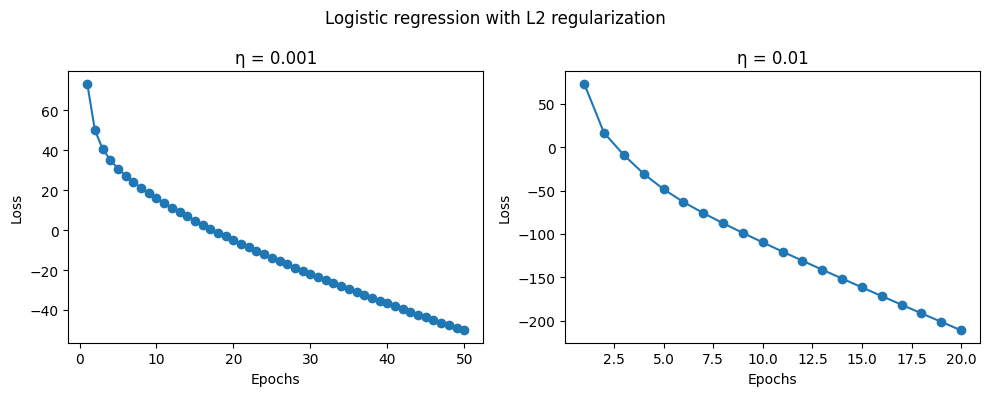

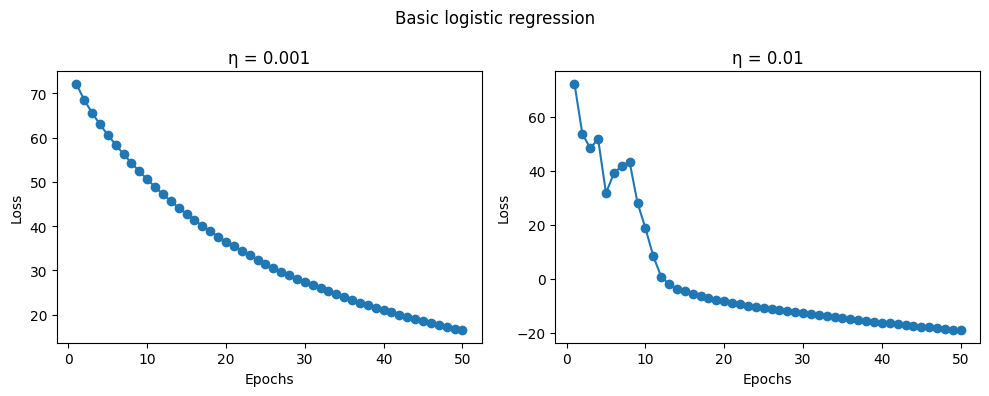

In [8]:
gaussian_noise_3 = np.random.normal(0, 4, X_train_std.shape)
X_noised_3 = X_train_std + gaussian_noise_3

fig, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

log1 = LogisticGD_L2(n_iter=50, eta=0.001).fit(X_noised_3, y_train)
ax1[0].plot(range(1, len(log1.cost_) + 1), log1.cost_, marker='o')
ax1[0].set_xlabel('Epochs')
ax1[0].set_ylabel('Loss')
ax1[0].set_title('η = 0.001')

log2 = LogisticGD_L2(n_iter=50, eta=0.01).fit(X_noised_3, y_train)
ax1[1].plot(range(1, len(log2.cost_) + 1), log2.cost_, marker='o')
ax1[1].set_xlabel('Epochs')
ax1[1].set_ylabel('Loss')
ax1[1].set_title('η = 0.01')
plt.suptitle("Logistic regression with L2 regularization")
plt.tight_layout()

#----------------------------------------------------------------------

gaussian_noise_4 = np.random.normal(0, 4, X_train_std.shape)
X_noised_4 = X_train_std + gaussian_noise_4

fig, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

log3 = LogisticGD(n_iter=50, eta=0.001).fit(X_noised_4, y_train)
ax2[0].plot(range(1, len(log3.cost_) + 1), log3.cost_, marker='o')
ax2[0].set_xlabel('Epochs')
ax2[0].set_ylabel('Loss')
ax2[0].set_title('η = 0.001')

log4 = LogisticGD(n_iter=50, eta=0.01).fit(X_noised_4, y_train)
ax2[1].plot(range(1, len(log4.cost_) + 1), log4.cost_, marker='o')
ax2[1].set_xlabel('Epochs')
ax2[1].set_ylabel('Loss')
ax2[1].set_title('η = 0.01')
plt.suptitle("Basic logistic regression")
plt.tight_layout()

plt.show()

As can be seen from the plots above, there are clearly fewer hiccups when regularization is applied compared to when it is not. Regularization works by reducing the effect of the features (weights), and as the regularization term increases, its impact becomes more noticeable.

5.4. (Optional for Undergraduate Students) Verify the formulation in (5.51), which is dual to the minimization of (5.50).

5.5. Experiment examples on pp. 84–91, Python Machine Learning, 3rd Ed., in order to optimize the performance of kernel SVM by finding a best kernel and optimal hyperparameters (gamma and C).

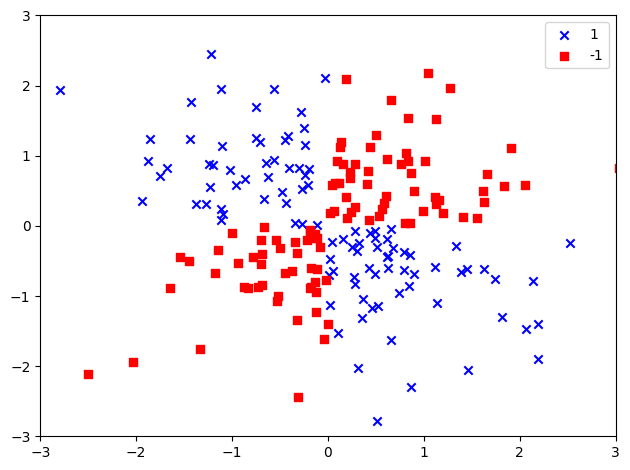

In [9]:
# Page 58-59 of Raschka's book. I need this later in exercise 5.5
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

# highlight test samples
    if test_idx:
      # plot all examples
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1],
                  c='none', edgecolor='black', alpha=1.0,
                  linewidth=1, marker='o',
                  s=100, label='test set')

# Pg. 84 (Kernel methods for linearly inseparable data)
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r', marker='s',
            label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

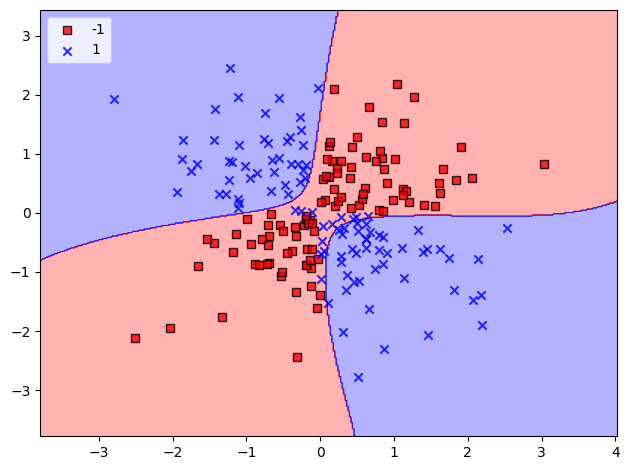

In [17]:
# Pg. 87
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=10)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

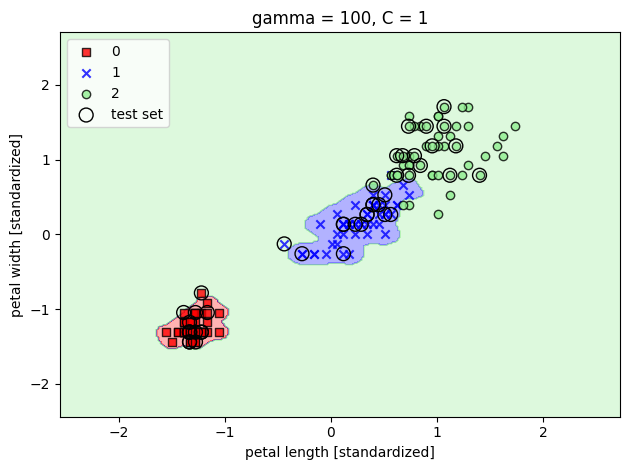

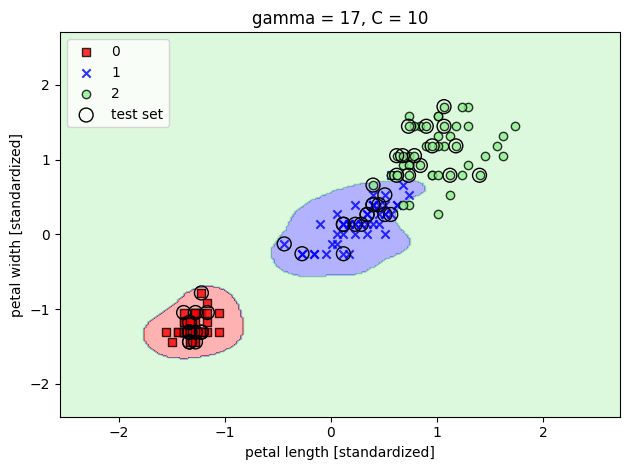

In [11]:
# Page 54
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1,
                                                    stratify=y)

# Page 56
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Page 59
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Page 88
svm1 = SVC(kernel = 'rbf', random_state=1, gamma=100, C=1)
svm1.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier = svm1,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title('gamma = 100, C = 1')
plt.tight_layout()
plt.show()

print()

svm2 = SVC(kernel = 'rbf', random_state=1, gamma=17, C=10)
svm2.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier = svm2,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title('gamma = 17, C = 10')

plt.tight_layout()
plt.show()

According to Scikit-learn official guide, there are 5 kernel functions for SVM: `linear`, `poly`, `rbf`, `sigmoid`, `precomputed`. I tested all and found out that just the `rbf` kernel works well with our dataset.

The parameter `C` trades off misclassification of training examples against simplicity of the decision surface. A low  makes the decision surface smooth, while a high C aims at classifying all training examples correctly. `gamma` defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

5.7. Implement a k-NN algorithm, from scratch, to run for the data used on page 106,
Python Machine Learning, 3rd Ed.. Compare your results with the figure on page
103 of the book.

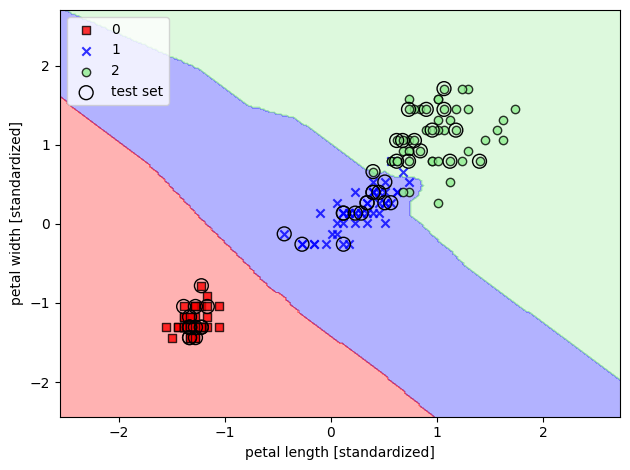

In [12]:
# Reference: https://shorturl.at/sKnGb (Kaggle)

# Dataset and plotting function already executed in upper cells

from math import sqrt
from statistics import mode

class kNN():
  def __init__(self, k=3):
    self.k = k

  def euclidean(self, v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def get_neighbors(self, test_row):
    distances = list()
    for (train_row, train_class) in zip(self.X_train, self.y_train):
      dist = self.euclidean(train_row, test_row)
      distances.append((dist, train_class))
    distances.sort(key=lambda x: x[0])
    neighbors = list()
    for i in range(self.k):
      neighbors.append(distances[i][1])
    return neighbors

  def predict(self, X_test):
    preds = []
    for test_row in X_test:
      nearest_neighbors = self.get_neighbors(test_row)
      # majority = stats.mode(nearest_neighbours)[0][0] # This didn't work
      majority = mode(nearest_neighbors)
      preds.append(majority)
    return np.array(preds)

knn = kNN(k=5)
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier = knn,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

The figure on page 103 is for Random forest ensemble. Comparing these 2 figures, I can deduce that:

1. kNN produced a smoother decision boundary compared to the Random forest ensemble.
2. The kNN boundary is less complex because it doesn't generalize as much as the Random forest ensemble. (less generalization == fewer calculation == lower complexity)
3. The kNN boundary appears tight with minimal margin, which suggests that kNN might struggle to perform well on larger datasets.

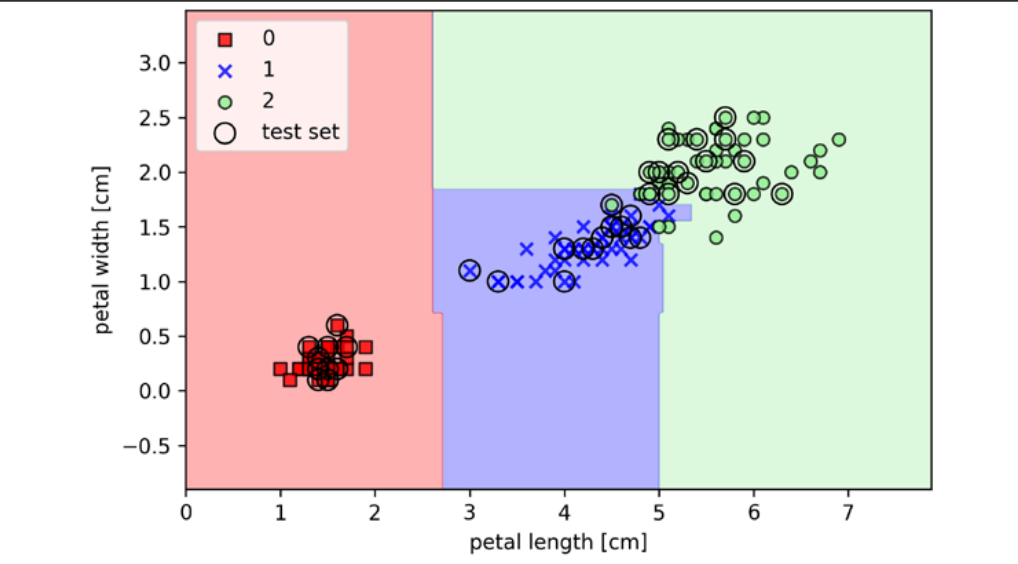